In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [2]:
my_dataset = pd.read_csv('books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
X = my_dataset.drop(['bookID', 'title', 'authors', 'isbn', 'isbn13', 'language_code', '  num_pages',
                     'publication_date', 'publisher'], 1)
y = my_dataset['  num_pages'].array.to_numpy().reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(pca.explained_variance_ratio_)
#average_rating, ratings_counts, text_reviews_count

[0.62540775 0.33244833 0.04214392]


##  Comparação dos resultados da seleção de características.

### mutual information

In [6]:
mic = mutual_info_classif(X_train, np.ravel(y_train))
print(mic)

[0.0307218  0.05882752 0.02294887]


In [7]:
mic = pd.Series(mic)

<AxesSubplot:>

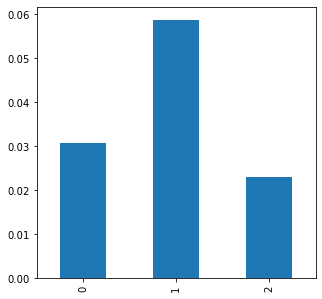

In [8]:
mic.plot.bar(figsize = (5,5))

### f_classif

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
f_classif = SelectKBest(score_func=f_classif, k=3)
fit = f_classif.fit(X_train, np.ravel(y_train))
features = fit.transform(X_test)

# Visualizando as features:
print(features)
#average_rating, ratings_counts, text_reviews_count

[[-0.25072748 -0.17333323 -0.03970046]
 [-0.18742415 -0.65402601 -0.01159786]
 [ 0.06270389 -0.52619314  0.04145754]
 ...
 [-0.3868198   2.29733172 -0.04505558]
 [ 0.98154256 -0.33217712  0.49232728]
 [-0.23968795 -0.25817926 -0.03965931]]


In [10]:
colunas = fit.get_support(indices=True)
#X.iloc[:,colunas]

## Método selecionado: Naive Bayes

In [11]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Número de pontos errados, total de %d points : %d" %(X_test.shape[0], (y_test != y_pred).sum()))

Número de pontos errados, total de 2225 points : 4923508


In [12]:
print("Acurácia", metrics.accuracy_score(y_test, y_pred))

Acurácia 0.0035955056179775282


**Referências**

[Implementing PCA in Python with Scikit-Learn](https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/)

[PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

[Métodos para selecionar as melhores variáveis do dataset em Python!](https://medium.com/@alegeorgelustosa/m%C3%A9todos-para-selecionar-as-melhores-vari%C3%A1veis-do-dataset-em-python-2c374b2e9df2)

[Aprenda como selecionar Features para seu Modelo de Machine Learning](https://minerandodados.com.br/aprenda-como-selecionar-features-para-seu-modelo-de-machine-learning/)

[Naive Bayes Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)